In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(
    "C:/Users/ap5176/Data/quantata/data/2022-08-29-07-07-54.tsv",
    sep="\t"
)
df.head()

,Symbol,ClosingDay,NextDay,SharePrice,ClosingDayBefore1Q,NextDayBefore1Q,SharePriceBefore1Q,ShareCount,MarketCapital,NetWorth,...,GrossOperatingMargin,NetProfitMargin,ROCRatio,IncomeGrowth1Q,IncomeGrowth1Y,RevenueGrowth1Q,RevenueGrowth1Y,AssetsGrowth1Q,AssetsGrowth1Y,SharePriceGrowth
0,095570.KS,2022-03-31,2022-04-01,6190.0,2021-12-31,2022-01-05,5320.000000,44767800,2.771127e+11,3.639947e+11,...,0.065052,0.036560,0.025540,21.670266,-20.586358,0.279583,0.177524,0.008994,-0.146789,0.163534
1,095570.KS,2021-12-31,2022-01-05,5320.0,2021-09-30,2021-10-01,5554.347656,44767800,2.381647e+11,3.639947e+11,...,0.065052,0.036560,0.025540,21.670266,-20.586358,0.279583,0.177524,0.008994,-0.146789,-0.042192
2,006840.KS,2022-03-31,2022-04-01,21950.0,2021-12-31,2022-01-05,19750.000000,13045500,2.863487e+11,5.742398e+11,...,-0.056586,-0.028238,-0.018162,-0.090780,-0.269456,0.008343,0.209056,-0.002690,0.095529,0.111392
3,006840.KS,2021-12-31,2022-01-05,19750.0,2021-09-30,2021-10-01,26671.447266,13045500,2.576486e+11,5.742398e+11,...,-0.056586,-0.028238,-0.018162,-0.090780,-0.269456,0.008343,0.209056,-0.002690,0.095529,-0.259508
4,282330.KS,2022-03-31,2022-04-01,174500.0,2021-12-31,2022-01-05,142000.000000,17275000,3.014488e+12,7.825517e+11,...,0.022285,0.015358,0.023770,-0.271353,0.203173,-0.029104,0.097050,0.033034,0.094978,0.228873


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 1692
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  1559 non-null   object 
 1   ClosingDay              1559 non-null   object 
 2   NextDay                 1559 non-null   object 
 3   SharePrice              1559 non-null   float64
 4   ClosingDayBefore1Q      1559 non-null   object 
 5   NextDayBefore1Q         1559 non-null   object 
 6   SharePriceBefore1Q      1559 non-null   float64
 7   ShareCount              1559 non-null   int64  
 8   MarketCapital           1559 non-null   float64
 9   NetWorth                1559 non-null   float64
 10  NetIncome               1559 non-null   float64
 11  TotalAssets             1559 non-null   float64
 12  TotalRevenue            1559 non-null   float64
 13  TotalCash               1559 non-null   float64
 14  TotalLiabilities        1559 non-null   

In [5]:
df.isna().sum()

Symbol                     0
ClosingDay                 0
NextDay                    0
SharePrice                 0
ClosingDayBefore1Q         0
NextDayBefore1Q            0
SharePriceBefore1Q         0
ShareCount                 0
MarketCapital              0
NetWorth                   0
NetIncome                  0
TotalAssets                6
TotalRevenue               0
TotalCash                 15
TotalLiabilities           6
GrossProfit                0
OperatingCashflow         26
OperatingIncome            0
EnterpriseValue           15
EarningsBeforeInterest     0
CurrentLiabilities         6
EmployedCapital            6
NetIncome1Y                0
NetIncomeBefore1Q          0
NetIncomeBefore1Y          0
TotalRevenue1Y             0
TotalRevenueBefore1Q       0
TotalRevenueBefore1Y       0
TotalAssets1Y              0
TotalAssetsBefore1Q        0
TotalAssetsBefore1Y        0
PERatio                    0
PBRatio                    0
PSRatio                    0
PCFRatio      

In [9]:
df = df.replace((np.inf, -np.inf), np.nan).dropna().reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1559 non-null   int64  
 1   Symbol                  1559 non-null   object 
 2   ClosingDay              1559 non-null   object 
 3   NextDay                 1559 non-null   object 
 4   SharePrice              1559 non-null   float64
 5   ClosingDayBefore1Q      1559 non-null   object 
 6   NextDayBefore1Q         1559 non-null   object 
 7   SharePriceBefore1Q      1559 non-null   float64
 8   ShareCount              1559 non-null   int64  
 9   MarketCapital           1559 non-null   float64
 10  NetWorth                1559 non-null   float64
 11  NetIncome               1559 non-null   float64
 12  TotalAssets             1559 non-null   float64
 13  TotalRevenue            1559 non-null   float64
 14  TotalCash               1559 non-null   

In [10]:
df.columns

Index(['index', 'Symbol', 'ClosingDay', 'NextDay', 'SharePrice',
       'ClosingDayBefore1Q', 'NextDayBefore1Q', 'SharePriceBefore1Q',
       'ShareCount', 'MarketCapital', 'NetWorth', 'NetIncome', 'TotalAssets',
       'TotalRevenue', 'TotalCash', 'TotalLiabilities', 'GrossProfit',
       'OperatingCashflow', 'OperatingIncome', 'EnterpriseValue',
       'EarningsBeforeInterest', 'CurrentLiabilities', 'EmployedCapital',
       'NetIncome1Y', 'NetIncomeBefore1Q', 'NetIncomeBefore1Y',
       'TotalRevenue1Y', 'TotalRevenueBefore1Q', 'TotalRevenueBefore1Y',
       'TotalAssets1Y', 'TotalAssetsBefore1Q', 'TotalAssetsBefore1Y',
       'PERatio', 'PBRatio', 'PSRatio', 'PCFRatio', 'EVEBITRatio',
       'EVSalesRatio', 'ROERatio', 'ROARatio', 'GPARatio', 'LARatio',
       'TurnoverRatio', 'GrossMargin', 'GrossOperatingMargin',
       'NetProfitMargin', 'ROCRatio', 'IncomeGrowth1Q', 'IncomeGrowth1Y',
       'RevenueGrowth1Q', 'RevenueGrowth1Y', 'AssetsGrowth1Q',
       'AssetsGrowth1Y', 'ShareP

In [17]:
features = [
    "PERatio", "PBRatio", "PSRatio", "PCFRatio", "EVEBITRatio",
    "EVSalesRatio", "ROERatio", "ROARatio", "GPARatio", "LARatio",
    "TurnoverRatio", "GrossMargin", "GrossOperatingMargin",
    "NetProfitMargin", "ROCRatio", "IncomeGrowth1Q", "IncomeGrowth1Y",
    "RevenueGrowth1Q", "RevenueGrowth1Y", "AssetsGrowth1Q",
    "AssetsGrowth1Y"
]

In [76]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[features])
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled,
    df["SharePriceGrowth"],
    test_size=0.25,
    shuffle=True,
)

In [77]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(x_train, y_train)
y_pred_dtr = model_dtr.predict(x_test)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
r2_dtr = r2_score(y_test, y_pred_dtr)
print(rmse_dtr, r2_dtr)

0.2559132526381139 -0.5969779556378039


In [78]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(rmse_lr, r2_lr)

0.22616117536765895 -0.24723839850201568


In [79]:
model_rfr = RandomForestRegressor()
model_rfr.fit(x_train, y_train)
y_pred_rfr = model_rfr.predict(x_test)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)
print(rmse_rfr, r2_rfr)

0.21221000876708393 -0.09810809855677016


In [80]:
for importance, feature in sorted(zip(model_dtr.feature_importances_, features), reverse=True):
    print(feature, importance)

EVSalesRatio 0.1177707600484333
PCFRatio 0.10333185304408056
PBRatio 0.09889056861238131
PERatio 0.09547953051609553
PSRatio 0.0878161426516524
EVEBITRatio 0.06894417317519846
IncomeGrowth1Y 0.051390232968213184
GrossOperatingMargin 0.04462741636064005
RevenueGrowth1Q 0.042375776444785566
IncomeGrowth1Q 0.037864673549390805
ROERatio 0.034056039302076076
RevenueGrowth1Y 0.03271517397372919
AssetsGrowth1Q 0.030662962608558164
AssetsGrowth1Y 0.026969158402000256
ROARatio 0.025589977901699007
LARatio 0.023595214718190156
ROCRatio 0.02339243461004356
TurnoverRatio 0.019765335307797813
NetProfitMargin 0.016417624717448055
GrossMargin 0.013005808961364133
GPARatio 0.005339142126222445


In [81]:
for importance, feature in sorted(zip(abs(model_lr.coef_), features), reverse=True):
    print(feature, importance)

PSRatio 4.749092533029323
EVSalesRatio 2.907228553906623
NetProfitMargin 2.846305037012242
GrossOperatingMargin 1.5547922911187324
RevenueGrowth1Q 0.6742478300201445
ROCRatio 0.40619929240427693
GrossMargin 0.38154337180772047
AssetsGrowth1Q 0.34159285234371217
AssetsGrowth1Y 0.2964096654303101
PERatio 0.28490988062517614
IncomeGrowth1Y 0.23203355499543976
PCFRatio 0.22837276325853276
GPARatio 0.2145665123034744
IncomeGrowth1Q 0.11774077317881475
EVEBITRatio 0.10268932994433538
RevenueGrowth1Y 0.07770108187159562
TurnoverRatio 0.07593161243235712
LARatio 0.07283597296542813
PBRatio 0.05262731837026747
ROARatio 0.041821471296037374
ROERatio 0.033557418573915025


In [82]:
for importance, feature in sorted(zip(model_rfr.feature_importances_, features), reverse=True):
    print(feature, importance)

PERatio 0.09596651648718424
PCFRatio 0.0831005170912513
PSRatio 0.07853907730124927
PBRatio 0.07212204665418526
EVSalesRatio 0.06232404700439345
EVEBITRatio 0.06148419714774361
RevenueGrowth1Y 0.046457543891790014
AssetsGrowth1Q 0.04420032611879599
ROARatio 0.043857802966371054
AssetsGrowth1Y 0.04088305695057284
LARatio 0.04079796880810534
ROERatio 0.04029796792374838
GrossOperatingMargin 0.039909525213843604
IncomeGrowth1Y 0.03989794454574878
RevenueGrowth1Q 0.03953235079666037
IncomeGrowth1Q 0.033137673691841917
NetProfitMargin 0.03222480129039367
ROCRatio 0.0312242278965427
GrossMargin 0.027758121894871403
TurnoverRatio 0.02535162377007579
GPARatio 0.020932662554630985


In [36]:
features_4p = ["PERatio", "PBRatio", "PSRatio", "PCFRatio"]

In [83]:
min_max_scaler_4p = MinMaxScaler()
x_scaled_4p = min_max_scaler_4p.fit_transform(df[features_4p])
x_train_4p, x_test_4p, y_train_4p, y_test_4p = train_test_split(
    x_scaled_4p,
    df["SharePriceGrowth"],
    test_size=0.25,
    shuffle=True,
)

In [85]:
model_rfr_4p = RandomForestRegressor()
model_rfr_4p.fit(x_train_4p, y_train_4p)
y_pred_rfr_4p = model_rfr_4p.predict(x_test_4p)
rmse_rfr_4p = np.sqrt(mean_squared_error(y_test_4p, y_pred_rfr_4p))
r2_rfr_4p = r2_score(y_test_4p, y_pred_rfr_4p)
print(rmse_rfr_4p, r2_rfr_4p)

0.18987511888585046 -0.08228212320283834


In [93]:
for importance, feature in sorted(zip(model_rfr_4p.feature_importances_, features_4p), reverse=True):
    print(feature, importance)

PERatio 0.272805853991032
PBRatio 0.26280432839370277
PSRatio 0.2558512264451149
PCFRatio 0.20853859117015025


<AxesSubplot:>

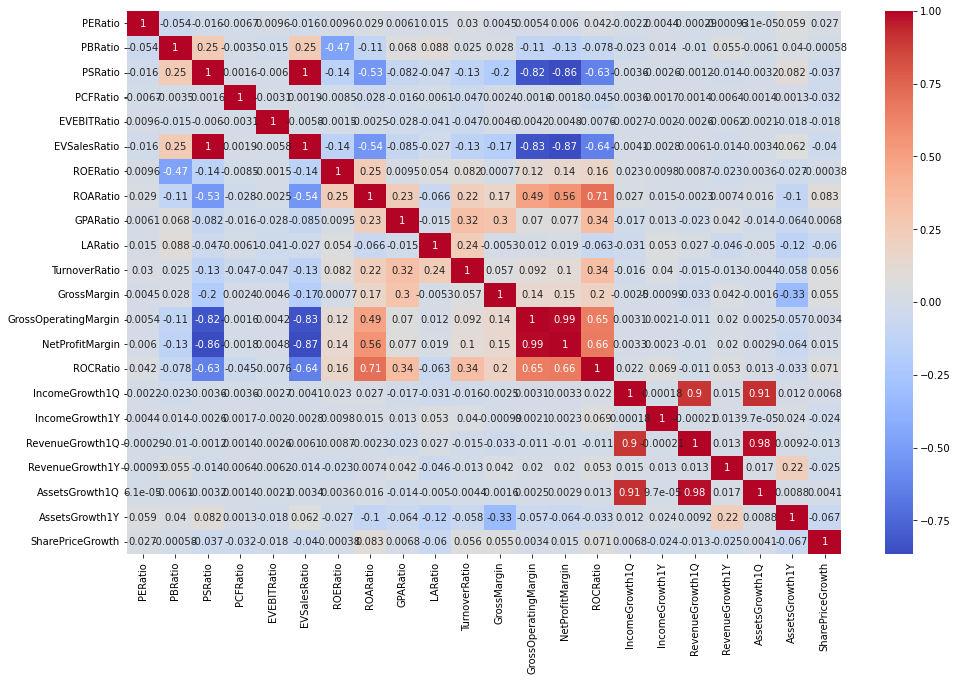

In [87]:
plt.figure(figsize=(16, 10))
sns.heatmap(df[features + ["SharePriceGrowth"]].corr(), annot=True, cmap="coolwarm")

In [53]:
features_low_corr = [
    "PERatio", "PBRatio", "PSRatio", "PCFRatio", "EVEBITRatio",
    "EVSalesRatio", "GPARatio", "LARatio",
    "IncomeGrowth1Q", "IncomeGrowth1Y",
    "RevenueGrowth1Y",
    "AssetsGrowth1Y"
]

In [88]:
min_max_scaler_low_corr = MinMaxScaler()
x_scaled_low_corr = min_max_scaler_low_corr.fit_transform(df[features_low_corr])
x_train_low_corr, x_test_low_corr, y_train_low_corr, y_test_low_corr = train_test_split(
    x_scaled_low_corr,
    df["SharePriceGrowth"],
    test_size=0.25,
    shuffle=True,
)

In [89]:
model_rfr_low_corr = RandomForestRegressor()
model_rfr_low_corr.fit(x_train_low_corr, y_train_low_corr)
y_pred_rfr_low_corr = model_rfr_low_corr.predict(x_test_low_corr)
rmse_rfr_low_corr = np.sqrt(mean_squared_error(y_test_low_corr, y_pred_rfr_low_corr))
r2_rfr_low_corr = r2_score(y_test_low_corr, y_pred_rfr_low_corr)
print(rmse_rfr_low_corr, r2_rfr_low_corr)

0.17593578629271797 -0.33623871553037343


In [92]:
for importance, feature in sorted(zip(model_rfr_low_corr.feature_importances_, features_low_corr), reverse=True):
    print(feature, importance)

PBRatio 0.13446593416479533
EVEBITRatio 0.09840294912028319
PCFRatio 0.09666272965981154
IncomeGrowth1Y 0.09629739201557883
RevenueGrowth1Y 0.08936758400498006
PERatio 0.08858945777491326
EVSalesRatio 0.08410729712457167
PSRatio 0.07711157804902577
AssetsGrowth1Y 0.07391014885383336
IncomeGrowth1Q 0.057460159940130026
LARatio 0.05203333762795546
GPARatio 0.0515914316641216
